<h1>20127661-Lê Phan Duy Tùng</h1>

In [476]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

<h1>1.Preparing the data sets</h1>

In [477]:

#! get data 
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [478]:

#! tranform letter to number
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [479]:
    
#! create label_train,label_test
x = df.drop('class',axis = 1)
y = df['class']
label_train = x.columns
label_test = x.columns

#! create feature_train,feature_test
#! case train/test = 40/60 
feature_train1,feature_test1,y_train1,y_test1 = train_test_split(x,y,train_size = 0.4,shuffle=True,stratify=y)
#! case train/test = 60/40 
feature_train2,feature_test2,y_train2,y_test2 = train_test_split(x,y,train_size = 0.6,shuffle=True,stratify=y)
#! case train/test = 80/20 
feature_train3,feature_test3,y_train3,y_test3 = train_test_split(x,y,train_size = 0.8,shuffle=True,stratify=y)
#! case train/test = 90/10 
feature_train4,feature_test4,y_train4,y_test4 = train_test_split(x,y,train_size = 0.9,shuffle=True,stratify=y)


<h1>2.Building the decision tree classifiers</h1>
<h2>2.1 (train/test) = 40/60</h2>

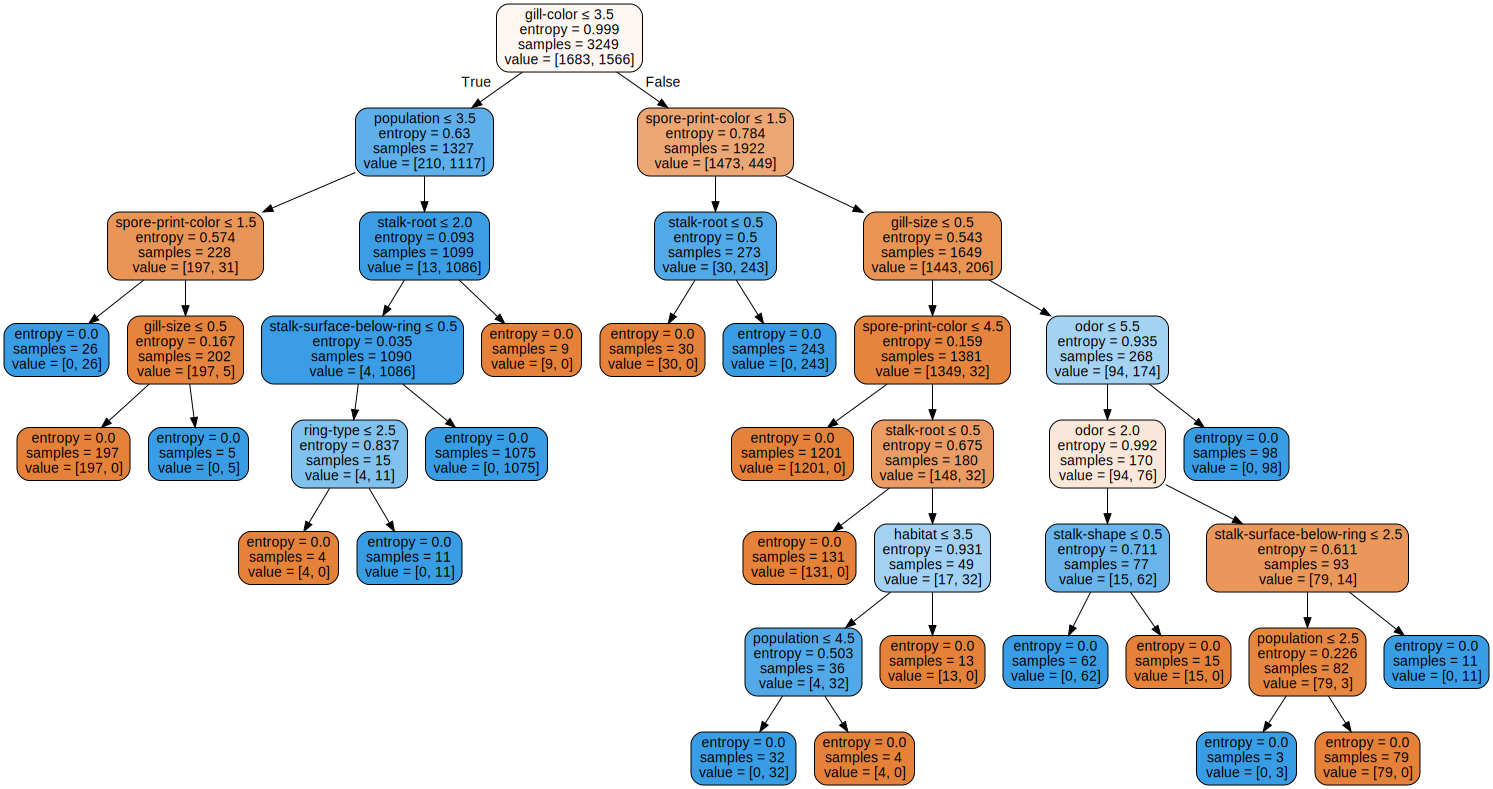

In [480]:

#!Building the decision tree classifiers
model1 = DecisionTreeClassifier(criterion = 'entropy')
model1 = model1.fit(feature_train1, y_train1)
dot_data = export_graphviz(model1, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

<h2>2.2 (train/test) = 60/40</h2>

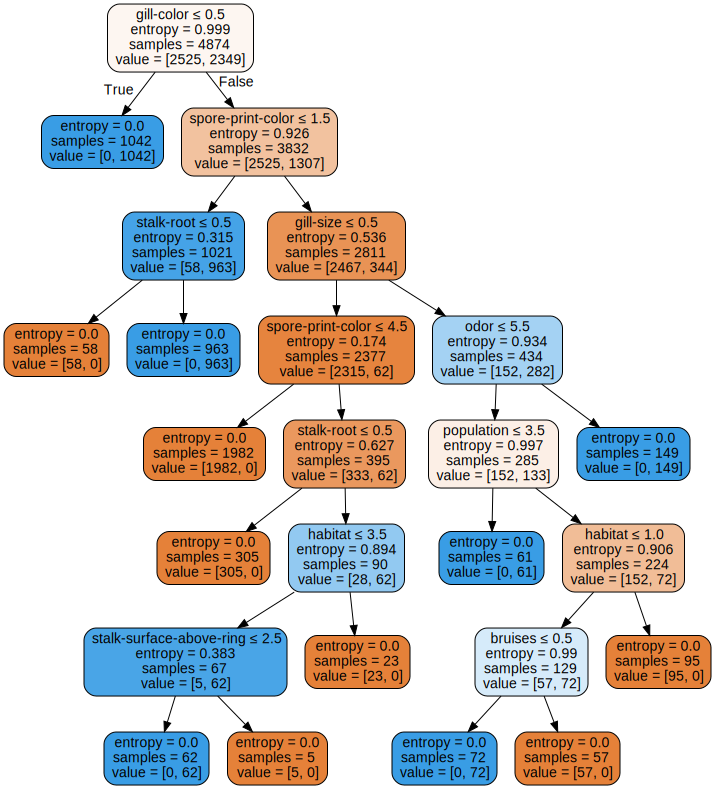

In [481]:

#!Building the decision tree classifiers
model2 = DecisionTreeClassifier(criterion = 'entropy')
model2 = model2.fit(feature_train2, y_train2)
dot_data = export_graphviz(model2, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

<h2>2.3 (train/test) = 80/20</h2>

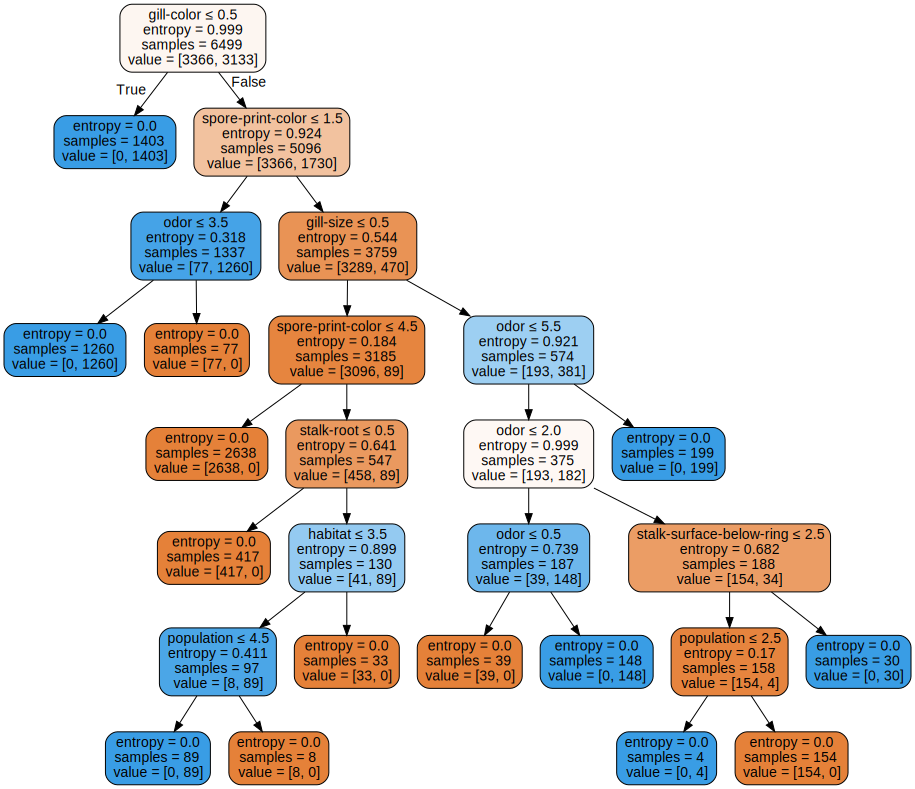

In [482]:

#!Building the decision tree classifiers
model3 = DecisionTreeClassifier(criterion = 'entropy')

model3 = model3.fit(feature_train3, y_train3)
dot_data = export_graphviz(model3, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

<h2>2.4 (train/test) = 90/10</h2>

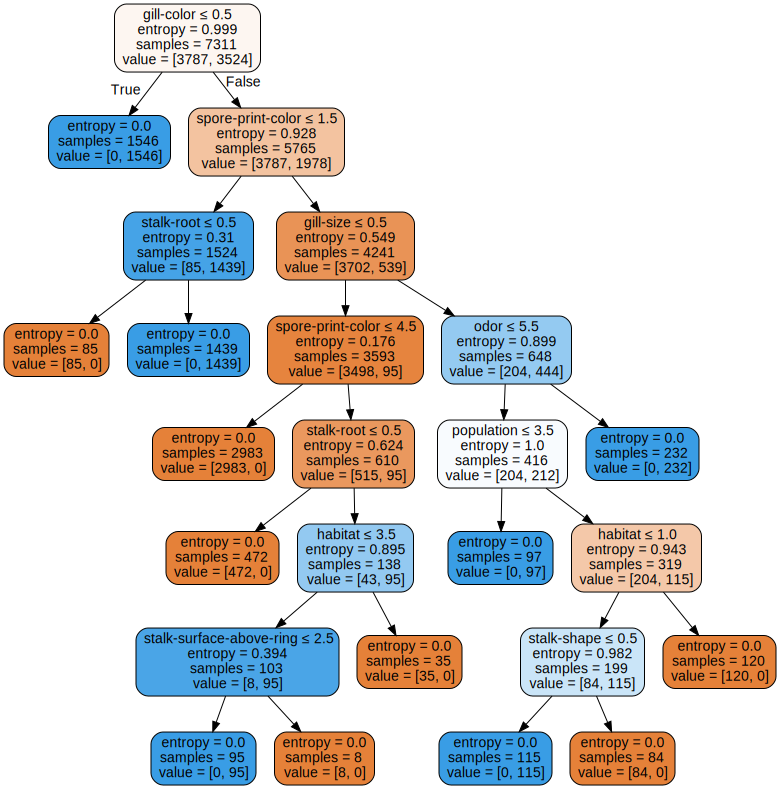

In [483]:

#!Building the decision tree classifiers
model4 = DecisionTreeClassifier(criterion = 'entropy')
model4 = model4.fit(feature_train4, y_train4)
dot_data = export_graphviz(model4, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

<h1>3.Evaluating the decision tree classifiers</h1>
<h2>3.1 (train/test) = 40/60</h2>

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2525
           1       1.00      1.00      1.00      2350

    accuracy                           1.00      4875
   macro avg       1.00      1.00      1.00      4875
weighted avg       1.00      1.00      1.00      4875



Text(0.5, 15.0, 'Predicted label')

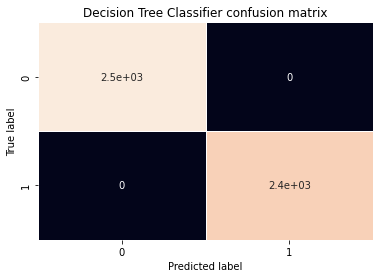

In [484]:

#!classification report
y_pred=model1.predict(feature_test1)
print("Decision Tree Classifier report \n", classification_report(y_test1, y_pred))
#!confusion matrix
cfm=confusion_matrix(y_test1, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2>3.2 (train/test) = 60/40</h2>

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      1.00      1.00      1567

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



Text(0.5, 15.0, 'Predicted label')

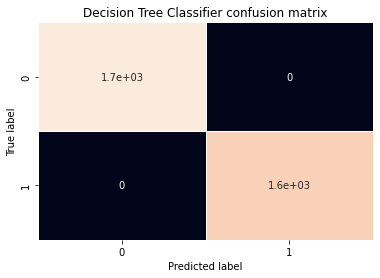

In [485]:

#!classification report
y_pred=model2.predict(feature_test2)
print("Decision Tree Classifier report \n", classification_report(y_test2, y_pred))
#!confusion matrix
cfm=confusion_matrix(y_test2, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2>3.3 (train/test) = 80/20</h2>

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 15.0, 'Predicted label')

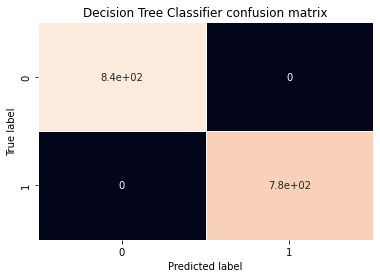

In [486]:

#!classification report
y_pred=model3.predict(feature_test3)
print("Decision Tree Classifier report \n", classification_report(y_test3, y_pred))
#!confusion matrix
cfm=confusion_matrix(y_test3, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2>3.4 (train/test) = 90/10</h2>

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00       392

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Text(0.5, 15.0, 'Predicted label')

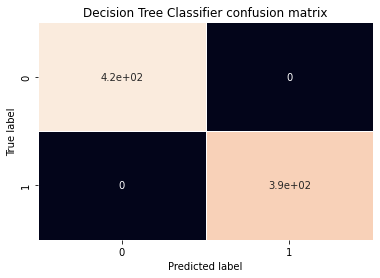

In [487]:

#!classification report
y_pred=model4.predict(feature_test4)
print("Decision Tree Classifier report \n", classification_report(y_test4, y_pred))
#!confusion matrix
cfm=confusion_matrix(y_test4, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h1>4.The depth and accuracy of a decision tree</h1>
<h2>4.1 max_depth = None</h2>

accuracy_score:  1.0


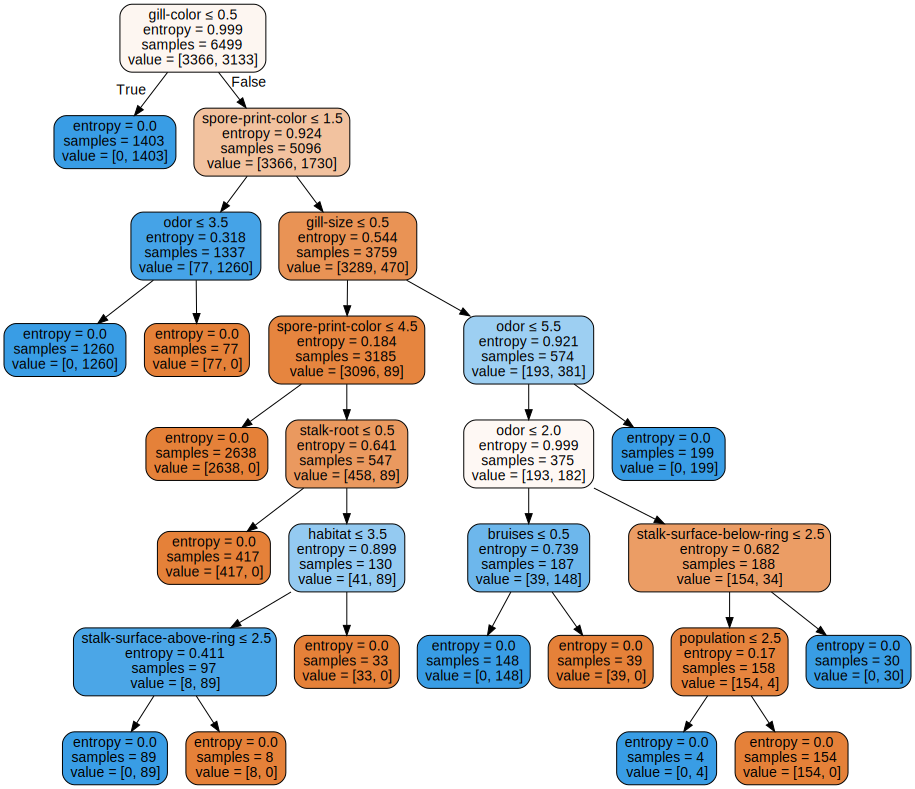

In [488]:

#!Building the decision tree classifiers
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model5 = model5.fit(feature_train3, y_train3)
dot_data = export_graphviz(model5, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

#! get accuracy_score 
y_pred=model5.predict(feature_test3)
print('accuracy_score: ',round(accuracy_score(y_test3, y_pred),4))
graph

<h2>4.2 max_depth = 2</h2>

accuracy_score:  0.9058


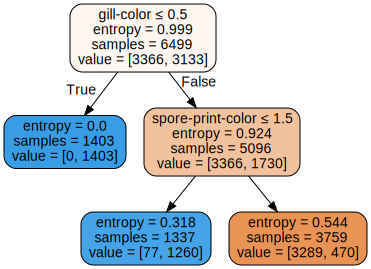

In [489]:

#!Building the decision tree classifiers
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)
model5 = model5.fit(feature_train3, y_train3)
dot_data = export_graphviz(model5, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

#! get accuracy_score 
y_pred=model5.predict(feature_test3)
print('accuracy_score: ',round(accuracy_score(y_test3, y_pred),4))
graph

<h2>4.3 max_depth = 3</h2>

accuracy_score:  0.9594


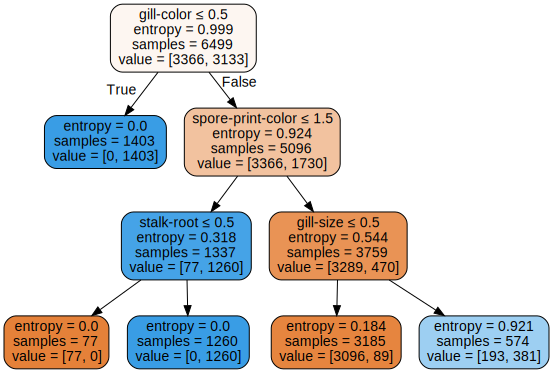

In [490]:

#!Building the decision tree classifiers
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model5 = model5.fit(feature_train3, y_train3)
dot_data = export_graphviz(model5, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

#! get accuracy_score 
y_pred=model5.predict(feature_test3)
print('accuracy_score: ',round(accuracy_score(y_test3, y_pred),4))
graph

<h2>4.4 max_depth = 4</h2>

accuracy_score:  0.9526


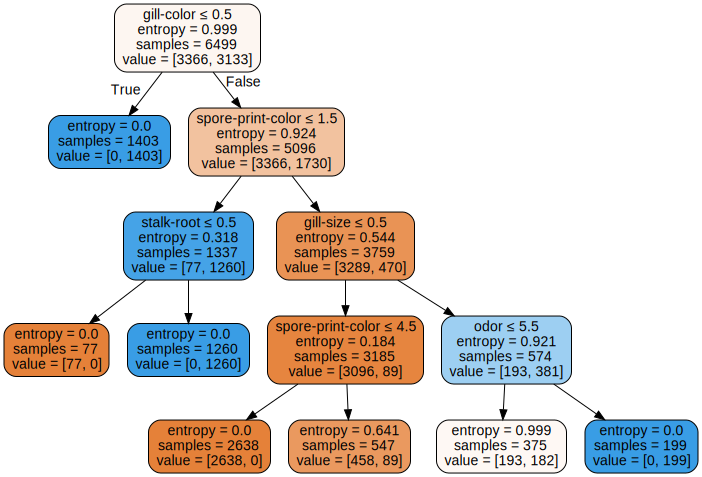

In [491]:

#!Building the decision tree classifiers
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
model5 = model5.fit(feature_train3, y_train3)
dot_data = export_graphviz(model5, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

#! get accuracy_score 
y_pred=model5.predict(feature_test3)
print('accuracy_score: ',round(accuracy_score(y_test3, y_pred),4))
graph

<h2>4.5 max_depth = 5</h2>

accuracy_score:  0.9815


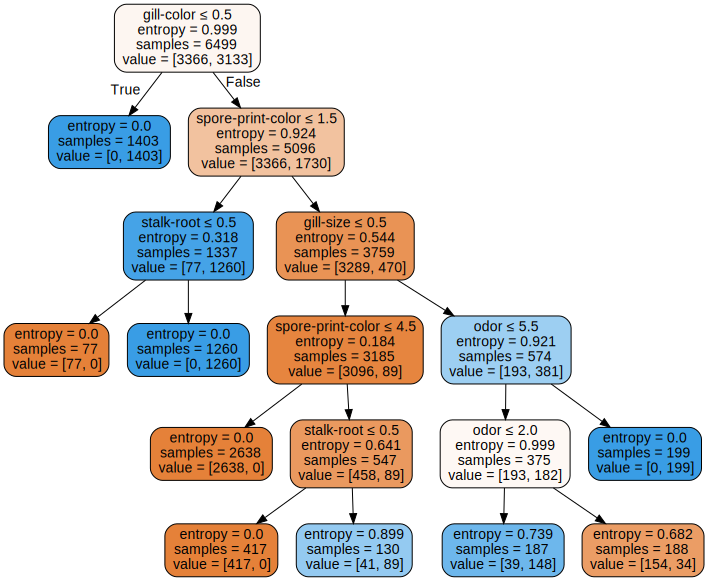

In [492]:

#!Building the decision tree classifiers
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
model5 = model5.fit(feature_train3, y_train3)
dot_data = export_graphviz(model5, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

#! get accuracy_score 
y_pred=model5.predict(feature_test3)
print('accuracy_score: ',round(accuracy_score(y_test3, y_pred),4))
graph

<h2>4.6 max_depth = 6</h2>

accuracy_score:  0.9975


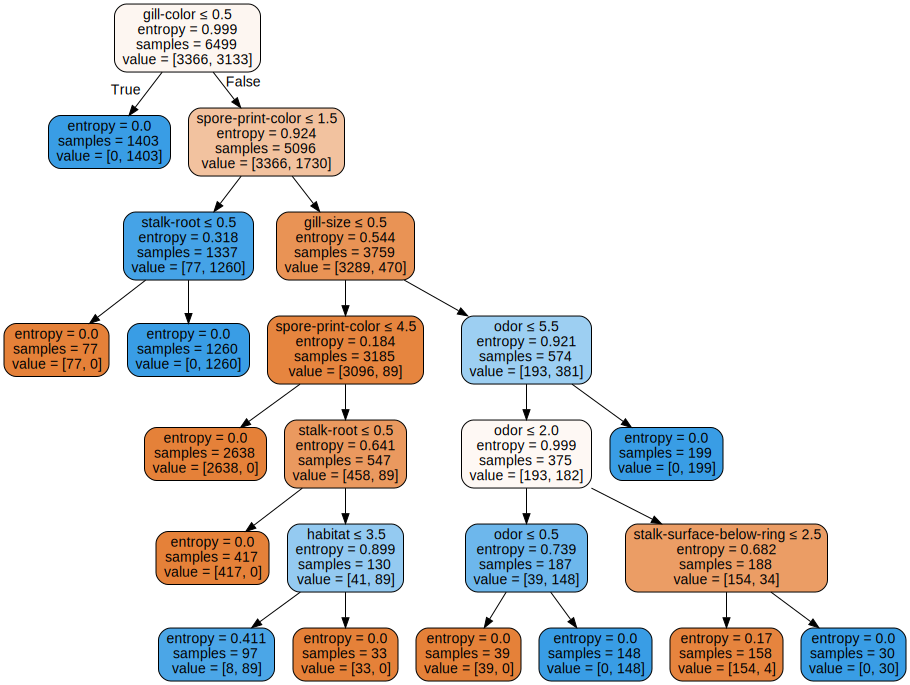

In [493]:

#!Building the decision tree classifiers
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 6)
model5 = model5.fit(feature_train3, y_train3)
dot_data = export_graphviz(model5, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

#! get accuracy_score 
y_pred=model5.predict(feature_test3)
print('accuracy_score: ',round(accuracy_score(y_test3, y_pred),4))
graph

<h2>4.7 max_depth = 7</h2>

accuracy_score:  1.0


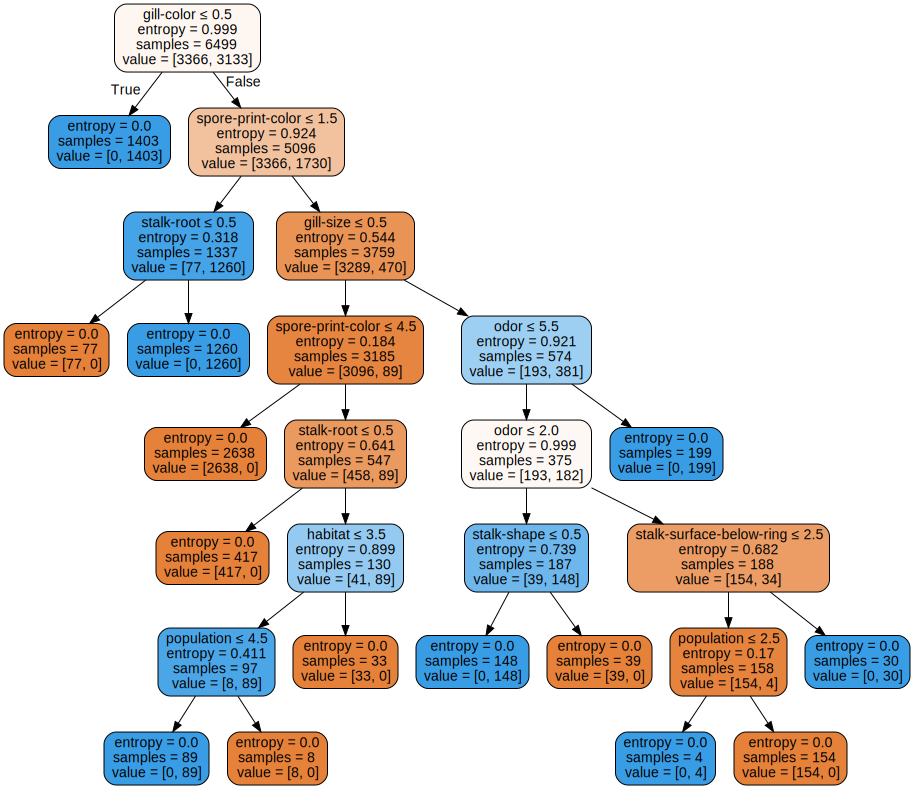

In [495]:

#!Building the decision tree classifiers
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7)
model5 = model5.fit(feature_train3, y_train3)
dot_data = export_graphviz(model5, out_file=None, 
                         feature_names=label_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

#! get accuracy_score 
y_pred=model5.predict(feature_test3)
print('accuracy_score: ',round(accuracy_score(y_test3, y_pred),4))

graph